In [183]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [184]:
X = pd.read_csv("../data/race.csv")
X.info()
Y = pd.read_csv("../data/ultra_rankings.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   race_year_id    1207 non-null   int64  
 1   event           1207 non-null   object 
 2   race            1207 non-null   object 
 3   city            1035 non-null   object 
 4   country         1203 non-null   object 
 5   date            1207 non-null   object 
 6   start_time      1207 non-null   object 
 7   participation   1207 non-null   object 
 8   distance        1207 non-null   float64
 9   elevation_gain  1207 non-null   int64  
 10  elevation_loss  1207 non-null   int64  
 11  aid_stations    1207 non-null   int64  
 12  participants    1207 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 122.7+ KB


In [185]:
#Renaming Solo to solo
X.loc[X.participation == "Solo", "participation"] = "solo"

In [186]:
#Renaming city ??? to right name

X.loc[X.race_year_id == 62705, "city"] = "Huanglong"
X.loc[X.race_year_id == 51649, "city"] = "Keelung"
X.loc[X.race_year_id == 45523, "city"] = "Keelung"


In [187]:
#Renaming NaN country to right country

X.loc[X.race_year_id == 27391, "country"] = "Israel"
X.loc[X.race_year_id == 11920, "country"] = "Israel"
X.loc[X.race_year_id == 6692, "country"] = "Israel"
X.loc[X.race_year_id == 4710, "country"] = "Israel"

In [189]:
#Distance = 0 => NaN
X.loc[X.distance == 0, "distance"] = np.nan
X.loc[X.elevation_gain == 0, "elevation_gain"] = np.nan
X.loc[X.elevation_loss == 0, "elevation_loss"] = np.nan

In [195]:
#Import frequency from ranking csv
X = X.assign( frequency_in_ranking = X['race_year_id'].map(Y['race_year_id'].value_counts()).fillna(0).astype(int) )
X = X.assign( participants = np.maximum(X.frequency_in_ranking, X.participants) )


<AxesSubplot:>

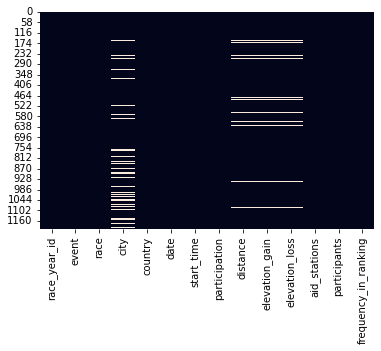

In [194]:
sns.heatmap(X.isnull(), cbar = False)

In [201]:
X = X.assign( year = X.date.str[:4] )

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,frequency_in_ranking,year
0,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520.0,-4520.0,10,150,25,2021
1,72496,UTMB®,UTMB®,Chamonix,France,2021-08-27,17:00:00,solo,170.7,9930.0,-9930.0,11,2300,1526,2021
2,69855,Grand Raid des Pyrénées,Ultra Tour 160,vielle-Aure,France,2021-08-20,05:00:00,solo,167.0,9980.0,-9980.0,13,600,455,2021
3,67856,Persenk Ultra,PERSENK ULTRA,Asenovgrad,Bulgaria,2021-08-20,18:00:00,solo,164.0,7490.0,-7500.0,13,150,55,2021
4,70469,Runfire Salt Lake Ultra,100 Mile,ulukisla,Turkey,2021-08-20,18:00:00,solo,159.9,100.0,-100.0,12,13,13,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,2320,Centurion Thames Path 100,Centurion Thames Path 100,London,United Kingdom,2012-03-03,00:00:00,solo,161.0,1600.0,-1600.0,0,114,114,2012
1203,3439,RUN2KILL,RUN2KILL,NaN,Germany,2012-02-24,00:00:00,solo,161.0,4000.0,-4000.0,0,15,15,2012
1204,5640,IRON HORSE Endurance RunS,IRON HORSE 100M,NaN,United States,2012-02-10,00:00:00,solo,161.0,2400.0,-2400.0,0,25,25,2012
1205,3202,Rocky Raccoon,100 Mile,Huntsville,United States,2012-02-04,00:00:00,solo,161.0,1800.0,-1800.0,0,218,218,2012
